In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from time import time
from sklearn.metrics import f1_score, accuracy_score

In [2]:
df = pd.read_csv("tranrecords.csv", na_values=':')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Amount       2500 non-null   float64
 1   TranNo       2456 non-null   object 
 2   Status       2459 non-null   object 
 3   Department   2486 non-null   object 
 4   Fiscal Year  2445 non-null   float64
 5   Month        2478 non-null   object 
 6   RedFlag      2500 non-null   int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 136.8+ KB


In [3]:
df.isnull()

,Amount,TranNo,Status,Department,Fiscal Year,Month,RedFlag
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2495,False,False,False,False,False,False,False
2496,False,False,False,False,False,False,False
2497,False,False,False,False,False,False,False
2498,False,False,False,False,False,False,False


In [4]:
df.isnull().sum()

Amount          0
TranNo         44
Status         41
Department     14
Fiscal Year    55
Month          22
RedFlag         0
dtype: int64

In [5]:
df.head(40)

,Amount,TranNo,Status,Department,Fiscal Year,Month,RedFlag
0,12.467270,C023134,Paid_Reconciled,R&D,2014.0,Jan,0
1,0.455159,C486034,Paid_Reconciled,Purchasing,2015.0,Sep,0
2,1.058052,C432586,Paid_Reconciled,Marketing,2018.0,May,0
3,3.328995,C901026,Paid_UnReconciled,Finance,2012.0,May,0
4,1.777077,C328289,Paid_Reconciled,Finance,2012.0,Oct,0
5,0.113475,E876463,Paid_Reconciled,Marketing,2018.0,May,0
6,0.130126,C525492,Paid_Reconciled,Finance,2014.0,Jan,0
7,6.957715,C579803,Paid_Reconciled,Marketing,2013.0,Apr,0
8,4.222575,C422593,Paid_Reconciled,Marketing,2017.0,May,0
9,43.424134,C194584,Paid_UnReconciled,Finance,2019.0,Apr,0


In [6]:
df.fillna(df.mean()).head(40)

C:\Users\hftin\AppData\Local\Temp/ipykernel_5240/2040282399.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean()).head(40)


,Amount,TranNo,Status,Department,Fiscal Year,Month,RedFlag
0,12.467270,C023134,Paid_Reconciled,R&D,2014.000000,Jan,0
1,0.455159,C486034,Paid_Reconciled,Purchasing,2015.000000,Sep,0
2,1.058052,C432586,Paid_Reconciled,Marketing,2018.000000,May,0
3,3.328995,C901026,Paid_UnReconciled,Finance,2012.000000,May,0
4,1.777077,C328289,Paid_Reconciled,Finance,2012.000000,Oct,0
5,0.113475,E876463,Paid_Reconciled,Marketing,2018.000000,May,0
6,0.130126,C525492,Paid_Reconciled,Finance,2014.000000,Jan,0
7,6.957715,C579803,Paid_Reconciled,Marketing,2013.000000,Apr,0
8,4.222575,C422593,Paid_Reconciled,Marketing,2017.000000,May,0
9,43.424134,C194584,Paid_UnReconciled,Finance,2019.000000,Apr,0


In [7]:
df.dropna().head(30)

,Amount,TranNo,Status,Department,Fiscal Year,Month,RedFlag
0,12.467270,C023134,Paid_Reconciled,R&D,2014.0,Jan,0
1,0.455159,C486034,Paid_Reconciled,Purchasing,2015.0,Sep,0
2,1.058052,C432586,Paid_Reconciled,Marketing,2018.0,May,0
3,3.328995,C901026,Paid_UnReconciled,Finance,2012.0,May,0
4,1.777077,C328289,Paid_Reconciled,Finance,2012.0,Oct,0
5,0.113475,E876463,Paid_Reconciled,Marketing,2018.0,May,0
6,0.130126,C525492,Paid_Reconciled,Finance,2014.0,Jan,0
7,6.957715,C579803,Paid_Reconciled,Marketing,2013.0,Apr,0
8,4.222575,C422593,Paid_Reconciled,Marketing,2017.0,May,0
9,43.424134,C194584,Paid_UnReconciled,Finance,2019.0,Apr,0


In [8]:
dfa = df['Amount']
dfa.min(), dfa.quantile(q=0.25), dfa.quantile(q=0.5), \
    dfa.quantile(q=0.75), dfa.max()

(0.0013588035896111,
 1.1768322150657688,
 4.672200947259141,
 19.919945218582576,
 4060.364436505363)

<AxesSubplot:>

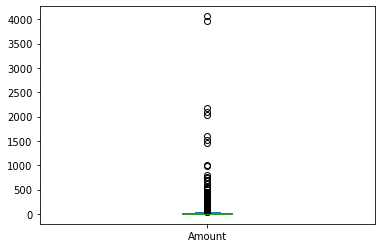

In [9]:
dfa.plot.box()

In [10]:
d = {"Jan":1, "Feb":2, "Mar":3, "Apr":4, "May":5, 
     "Jun":6, "Jul":7, "Aug":8,
    "Sep":9, "Oct":10, "Nov":11, "Dec":12}
df['Month'] = df['Month'].map(d)
df['Month'].head(10)

0     1.0
1     9.0
2     5.0
3     5.0
4    10.0
5     5.0
6     1.0
7     4.0
8     5.0
9     4.0
Name: Month, dtype: float64

In [11]:
df['Month'].mean()

5.979015334947539

In [12]:
d = {"Paid_Reconciled":0, "Paid_UnReconciled":1}
df['Status'] = df['Status'].map(d)
df['Status'].head(10)

0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    1.0
Name: Status, dtype: float64

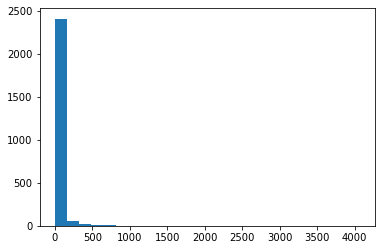

In [13]:
pic = plt.hist(df['Amount'],bins=25)

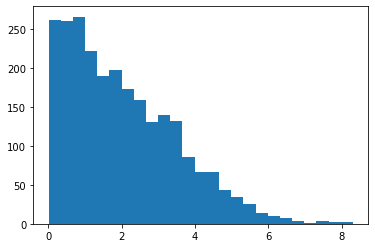

In [14]:
df['Amount'] = df['Amount'].apply(lambda x: np.log(x+1))
pic = plt.hist(df['Amount'], bins=25)

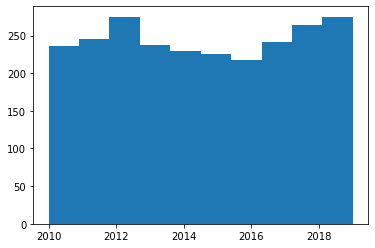

In [15]:
pic = plt.hist(df['Fiscal Year'], bins=10)

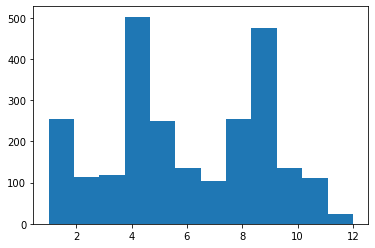

In [16]:
pic = plt.hist(df['Month'],bins=12)

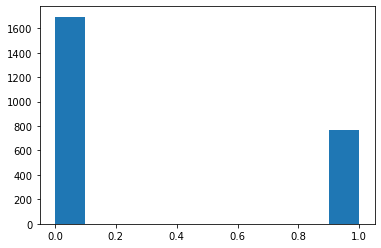

In [17]:
pic = plt.hist(df['Status'])

In [26]:
np.cov(df['Amount'].fillna(df['Month'].mean()), df['RedFlag'])

array([[2.22031009, 0.31095493],
       [0.31095493, 0.11373685]])

In [25]:
np.cov(df['Month'].fillna(df['Month'].mean()), df['RedFlag'])

array([[9.0992032 , 0.02633854],
       [0.02633854, 0.11373685]])

In [27]:
np.cov(df['Status'].fillna(df['Status'].mean()), df['RedFlag'])

array([[0.21073578, 0.01974177],
       [0.01974177, 0.11373685]])

In [28]:
np.cov(df['Fiscal Year'].fillna(df['Fiscal Year'].mean()), df['RedFlag'])

array([[ 8.37027261, -0.02253711],
       [-0.02253711,  0.11373685]])

In [29]:
from sklearn.preprocessing import MinMaxScaler

data = pd.DataFrame(df)
scaler = MinMaxScaler()
numerical = ['Amount','Month','Status']
data[numerical] = scaler.fit_transform(data[numerical])

In [30]:
data[numerical]

,Amount,Month,Status
0,0.312823,0.000000,0.0
1,0.044988,0.727273,0.0
2,0.086713,0.363636,0.0
3,0.176215,0.363636,1.0
4,0.122779,0.818182,0.0
...,...,...,...
2495,0.165648,0.636364,0.0
2496,0.168302,0.454545,0.0
2497,0.527298,0.363636,0.0
2498,0.670661,0.090909,1.0


In [31]:
from sklearn.model_selection import train_test_split

data = data.dropna()
X_train, X_test, y_train, y_test = train_test_split(data[['Amount','Month','Status']], 
                                  data['RedFlag'], test_size=0.2, random_state=0)
print(f"Training set has {X_train.shape[0]} samples")
print(f"Testing set has {X_test.shape[0]} samples")


Training set has 1863 samples
Testing set has 466 samples


In [32]:
summary = pd.DataFrame(columns=['Learner', 'Train Time', 'Pred Time', 'Acc score', 'F1 score',
                               'Precision', 'Recall'])


In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, \
        recall_score, classification_report, confusion_matrix

NB = GaussianNB()
start = time()
NB.fit(X_train, y_train)
mid = time()
pred = NB.predict(X_test)
end = time()

pred_res = pd.DataFrame(pred)
pred_res = pred_res.set_index(y_test.index)

In [34]:
pred_res

,0
1861,0
2227,0
756,0
342,0
1295,0
...,...
1419,0
1152,1
1321,0
306,0


In [35]:
summary = summary.append({'Learner':'GaussianNB','Train Time':mid-start, 'Pred Time':end-mid,
               'Acc score':accuracy_score(y_test, pred),
               'F1 score':f1_score(y_test,pred,average='macro'),
               'Precision':precision_score(y_test,pred,average='macro'),
               'Recall': recall_score(y_test,pred,average='macro')}, ignore_index=True)
summary

,Learner,Train Time,Pred Time,Acc score,F1 score,Precision,Recall
0,GaussianNB,0.0,0.0,0.959227,0.915621,0.935524,0.89824


In [36]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0)
start = time()
LR.fit(X_train, y_train)
mid = time()
pred = LR.predict(X_test)
end = time()

summary = summary.append({'Learner':'LogisticReg','Train Time':mid-start, 'Pred Time':end-mid,
               'Acc score':accuracy_score(y_test, pred),
               'F1 score':f1_score(y_test,pred,average='macro'),
               'Precision':precision_score(y_test,pred,average='macro'),
               'Recall': recall_score(y_test,pred,average='macro')}, ignore_index=True)
summary

,Learner,Train Time,Pred Time,Acc score,F1 score,Precision,Recall
0,GaussianNB,0.000000,0.00000,0.959227,0.915621,0.935524,0.89824
1,LogisticReg,0.016996,0.00949,0.933476,0.846246,0.924379,0.79931


In [37]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(max_features=0.2, max_depth=2, 
                            min_samples_split=2, random_state=0)
start = time()
DT.fit(X_train, y_train)
mid = time()
pred = DT.predict(X_test)
end = time()
summary = summary.append({'Learner':'DecisionTree','Train Time':mid-start, 'Pred Time':end-mid,
               'Acc score':accuracy_score(y_test, pred),
               'F1 score':f1_score(y_test,pred,average='macro'),
               'Precision':precision_score(y_test,pred,average='macro'),
               'Recall': recall_score(y_test,pred,average='macro')}, ignore_index=True)
summary

,Learner,Train Time,Pred Time,Acc score,F1 score,Precision,Recall
0,GaussianNB,0.000000,0.00000,0.959227,0.915621,0.935524,0.898240
1,LogisticReg,0.016996,0.00949,0.933476,0.846246,0.924379,0.799310
2,DecisionTree,0.016727,0.00000,0.869099,0.568224,0.933406,0.557971


In [38]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(max_depth=2)
start = time()
RF.fit(X_train, y_train)
mid = time()
pred = RF.predict(X_test)
end = time()

summary = summary.append({'Learner':'RandomForest','Train Time':mid-start, 'Pred Time':end-mid,
               'Acc score':accuracy_score(y_test, pred),
               'F1 score':f1_score(y_test,pred,average='macro'),
               'Precision':precision_score(y_test,pred,average='macro'),
               'Recall': recall_score(y_test,pred,average='macro')}, ignore_index=True)
summary

,Learner,Train Time,Pred Time,Acc score,F1 score,Precision,Recall
0,GaussianNB,0.000000,0.00000,0.959227,0.915621,0.935524,0.898240
1,LogisticReg,0.016996,0.00949,0.933476,0.846246,0.924379,0.799310
2,DecisionTree,0.016727,0.00000,0.869099,0.568224,0.933406,0.557971
3,RandomForest,0.397990,0.02885,0.976395,0.949861,0.986520,0.920290


In [39]:
from sklearn.ensemble import ExtraTreesClassifier

ET = ExtraTreesClassifier(max_depth=2)
start = time()
ET.fit(X_train, y_train)
mid = time()
pred = ET.predict(X_test)
end = time()

summary = summary.append({'Learner':'ExtraTrees','Train Time':mid-start, 'Pred Time':end-mid,
               'Acc score':accuracy_score(y_test, pred),
               'F1 score':f1_score(y_test,pred,average='macro'),
               'Precision':precision_score(y_test,pred,average='macro'),
               'Recall': recall_score(y_test,pred,average='macro')}, ignore_index=True)
summary

C:\Users\hftin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Learner,Train Time,Pred Time,Acc score,F1 score,Precision,Recall
0,GaussianNB,0.000000,0.000000,0.959227,0.915621,0.935524,0.898240
1,LogisticReg,0.016996,0.009490,0.933476,0.846246,0.924379,0.799310
2,DecisionTree,0.016727,0.000000,0.869099,0.568224,0.933406,0.557971
3,RandomForest,0.397990,0.028850,0.976395,0.949861,0.986520,0.920290
4,ExtraTrees,0.273114,0.006026,0.851931,0.460023,0.425966,0.500000


In [40]:
from sklearn.linear_model import SGDClassifier

SGD = SGDClassifier(loss='hinge', penalty="l2")
start = time()
SGD.fit(X_train, y_train)
mid = time()
pred = SGD.predict(X_test)
end = time()

summary = summary.append({'Learner':'SGD','Train Time':mid-start, 'Pred Time':end-mid,
               'Acc score':accuracy_score(y_test, pred),
               'F1 score':f1_score(y_test,pred,average='macro'),
               'Precision':precision_score(y_test,pred,average='macro'),
               'Recall': recall_score(y_test,pred,average='macro')}, ignore_index=True)
summary

,Learner,Train Time,Pred Time,Acc score,F1 score,Precision,Recall
0,GaussianNB,0.000000,0.000000,0.959227,0.915621,0.935524,0.898240
1,LogisticReg,0.016996,0.009490,0.933476,0.846246,0.924379,0.799310
2,DecisionTree,0.016727,0.000000,0.869099,0.568224,0.933406,0.557971
3,RandomForest,0.397990,0.028850,0.976395,0.949861,0.986520,0.920290
4,ExtraTrees,0.273114,0.006026,0.851931,0.460023,0.425966,0.500000
5,SGD,0.017087,0.003696,0.948498,0.889874,0.925364,0.862009
